<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score 
import sklearn.datasets as skd
import plotnine as gg
from plotnine import ggplot, aes
import statsmodels.api as sm

# regression

In [2]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [3]:
raw1 = sm.datasets.get_rdataset('SLID', 'carData')

In [4]:
raw1.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache'])

In [5]:
d1 = raw1['data']
d1.head()

,wages,education,age,sex,language
0,10.56,15.0,40,Male,English
1,11.00,13.2,19,Male,English
2,NaN,16.0,49,Male,Other
3,17.76,14.0,46,Male,Other
4,NaN,8.0,71,Male,English


In [6]:
d1.isnull().sum()

wages        3278
education     249
age             0
sex             0
language      121
dtype: int64

In [7]:
d1.shape

(7425, 5)

In [8]:
d1.dropna().shape

(3987, 5)

In [9]:
d2 = d1.dropna()

In [10]:
d2= pd.get_dummies(d2, columns = ['sex', 'language'])

In [11]:
x = d2[['education', 'age', 'sex_Female', 'sex_Male',
       'language_English', 'language_French', 'language_Other']]
y = d2['wages']

In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [13]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

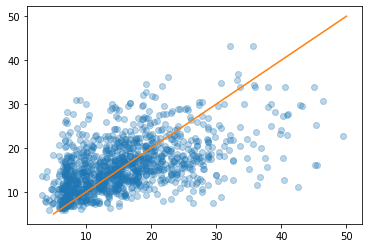

In [14]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)
plt.plot([5,50], [5,50])

In [15]:
d2 = pd.melt(d1, id_vars = ['wages', 'sex', 'language'])
d2.head()

,wages,sex,language,variable,value
0,10.56,Male,English,education,15.0
1,11.00,Male,English,education,13.2
2,NaN,Male,Other,education,16.0
3,17.76,Male,Other,education,14.0
4,NaN,Male,English,education,8.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 6689 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


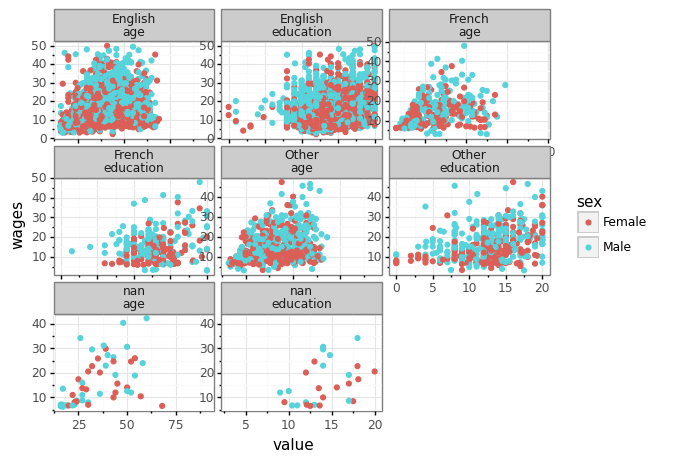

<ggplot: (8753977320537)>

In [16]:
(
    ggplot(d2, aes('value', 'wages', color = 'sex')) +
    gg.geom_point() +
    gg.facet_wrap('~language+variable', scales = 'free') +
    gg.theme_bw()
)